In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import re


In [75]:
#get run name from here
import os
path=os.getcwd()
os.listdir(path)

['-LEN100000LR0.0000001ER256LOOPS4EPOCHES8Q_LOOPS2-actor',
 '-LEN100000LR0.0000001ER256LOOPS4EPOCHES8Q_LOOPS2-critic0',
 '-LEN100000LR0.0000001ER256LOOPS4EPOCHES8Q_LOOPS2-critic1',
 '-LEN100000LR0.0000001ER256LOOPS4EPOCHES8Q_LOOPS2-critic2',
 '-LEN100000LR0.0000001ER256LOOPS4EPOCHES8Q_LOOPS2-critic3',
 '-LEN100000LR0.0000001ER256LOOPS4EPOCHES8Q_LOOPS2-critic4',
 '-LEN100000LR0.0000001ER256LOOPS4EPOCHES8Q_LOOPS2-critic5',
 '-LEN100000LR0.0000001ER256LOOPS4EPOCHES8Q_LOOPS2-critic6',
 '-LEN100000LR0.0000001ER256LOOPS4EPOCHES8Q_LOOPS2-critic7',
 '.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'actions_LEN100000LR0.0000001ER256LOOPS4EPOCHES8Q_LOOPS2',
 'bdpi.py',
 'gym_envs',
 'LEN100000LR0.0000001ER256LOOPS4EPOCHES8Q_LOOPS2-latest.episode',
 'LEN100000LR0.0000001ER256LOOPS4EPOCHES8Q_LOOPS2.episode',
 'main.py',
 'models',
 'monitor_training.ipynb',
 'out_LEN100000LR0.0000001ER256LOOPS4EPOCHES8Q_LOOPS2',
 'paper.pdf',
 'probs_LEN100000LR0.0000001ER256LOOPS4EPOCHES8Q_LOOPS2',
 'probs_normaliz

In [76]:
#enter run name here
run_name= "_LEN100000LR0.0000001ER256LOOPS4EPOCHES8Q_LOOPS2"

Read text files

In [108]:
out = pd.read_csv('out'+run_name, sep=" ", header=None)
out.columns = ['episode','reward', 'seen_reward', 'avg', 'total_timesteps', 'total_seconds', 'length']

qvalues = pd.read_csv('Q_values'+run_name, sep=" ", header=None)
qvalues.columns = ['q_min', 'q_mean', 'q_max']

In [109]:
f=open('probs'+run_name)
triplets=f.read()
triplets=triplets[myString.find('['):]
triplets = re.sub('].*?\[','][',triplets, flags=re.DOTALL)
        
triplets=triplets.replace('\n', "").replace('    ', " ").replace('   ', " ").replace('  ', " ").split('][')
for i in range(0,len(triplets)): 
    triplets[i]=triplets[i].replace('[', "").replace(']', "").rstrip(' ').split(' ')
f.close()
probs_mat=np.array(triplets, dtype=np.float)

In [110]:
f=open('probs_normalized'+run_name)
triplets=f.read()
triplets=triplets[myString.find('['):]
triplets = re.sub('].*?\[','][',triplets, flags=re.DOTALL)
        
triplets=triplets.replace('\n', "").replace('    ', " ").replace('   ', " ").replace('  ', " ").split('][')
for i in range(0,len(triplets)): 
    triplets[i]=triplets[i].replace('[', "").replace(']', "").rstrip(' ').split(' ')
f.close()
probs_n_mat=np.array(triplets, dtype=np.float)

In [111]:
#np.shape(A)
probs=pd.DataFrame(data=probs_mat,    # values
             index=range(np.shape(probs_mat)[0]),    # 1st column as index
             columns=range(1,54))

probs_n=pd.DataFrame(data=probs_n_mat,    # values
             index=range(np.shape(probs_n_mat)[0]),    # 1st column as index
             columns=range(1,54))

In [112]:
f=open('actions'+run_name)
triplets=f.read()
triplets = re.sub('e.*?\[','[',triplets, flags=re.DOTALL)
        
triplets=triplets.split('\neps#')
i=0
while i<len(triplets): 
    triplets[i]=triplets[i].split('\n')
    if len((triplets[i]))==1:
         del triplets[i]
         i+=-1
    else:
        triplets[i][0]=int(triplets[i][0])
        for j in range(1,len(triplets[i])):
            triplets[i][j]=triplets[i][j].split(' to ')
            if len(triplets[i][j])==2:
                triplets[i][j] = list(map(int, triplets[i][j]))
    i+=1
f.close()
actions_list=triplets

Look at training

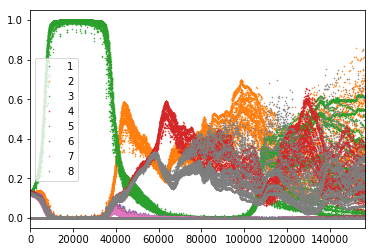

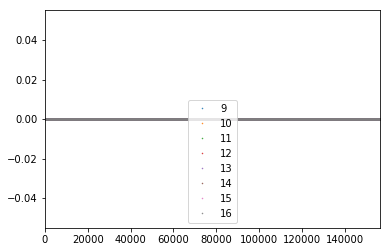

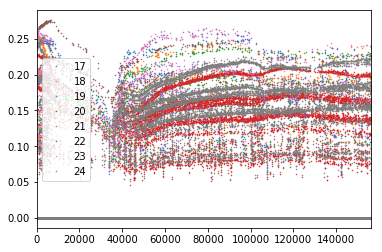

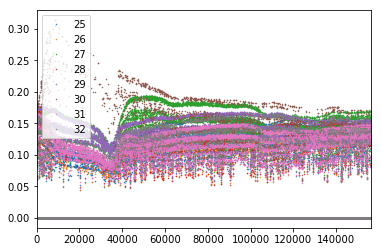

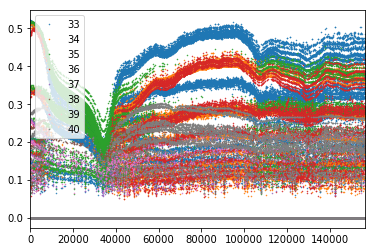

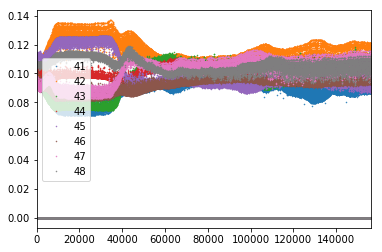

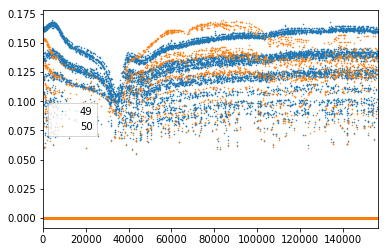

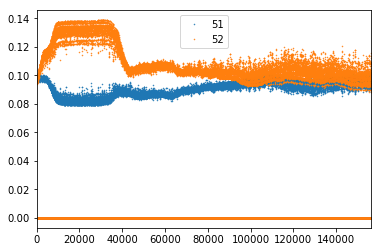

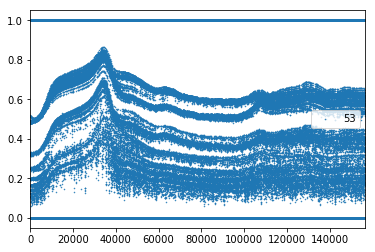

In [113]:
#Probilities based on action type, in order, gate to parking, parking to gate, 
                                            #parking to cleaning, cleaning to parking
                                            #parking to relocation, relocation to parking
                                            #cleaning to relocation, relocation to cleaning
                                            #wait
for i in [[1,8],[9,16],[17,24],[25,32],[33,40],[41,48],[49,50],[51,52],[53,53]]:    
    probs_n[list(range(i[0],i[1]+1))].plot(linestyle='None', marker='.',markersize = 1.0)

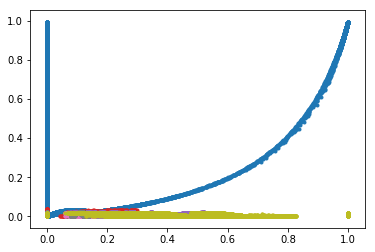

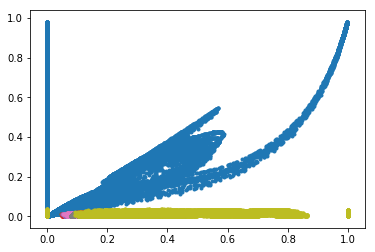

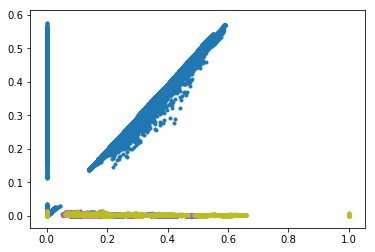

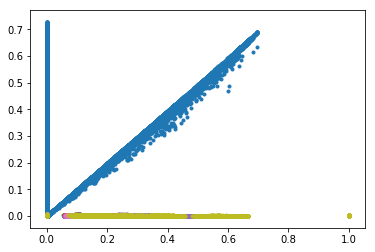

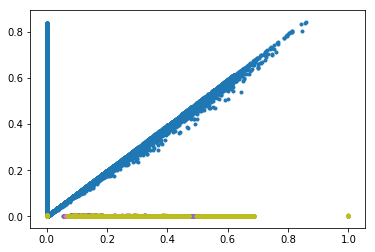

In [114]:
#Effect of filtering unfeasaable actions
for j in range(5):
    a=int(0.2*j*len(probs_n))
    b=int(0.2*(j+1)*len(probs_n))
    for i in [[1,8],[9,16],[17,24],[25,32],[33,40],[41,48],[49,50],[51,52],[53,53]]: 
            plt.scatter(x=probs_n[list(range(i[0],i[1]+1))][a:b],y=probs[list(range(i[0],i[1]+1))][a:b],linestyle='None', marker='.')
    plt.show()

for i in range(len(triplets)):
        if len(triplets[i])!=53:
            print(i,len(triplets[i]),triplets[i])



data[(data.reward>11) ].reward.plot()
data[(data.reward<11) & (data.reward>5)].reward.plot()
data[(data.reward<5) & (data.reward>0)].reward.plot()
data[data.reward<0].reward.plot()

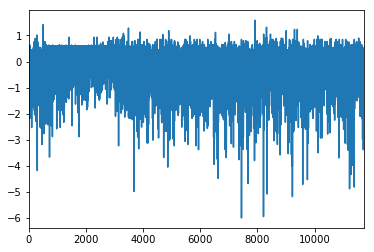

In [115]:
#reward
out.reward.plot()

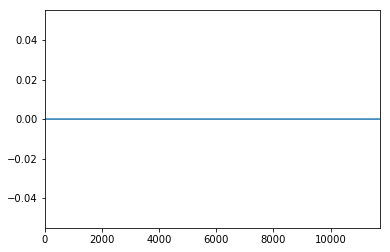

In [116]:
#approximate solved with score of episode
reward_threshold=15
out.reward.apply(lambda x:  x> reward_threshold).cumsum().div(out.index.to_series(), axis=0).plot()

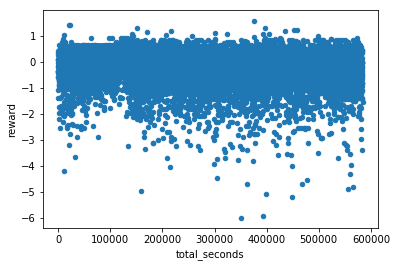

In [117]:
out.plot.scatter(x='total_seconds',y='reward')


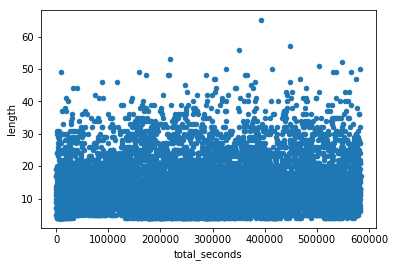

In [118]:
out.plot.scatter(x='total_seconds',y='length')

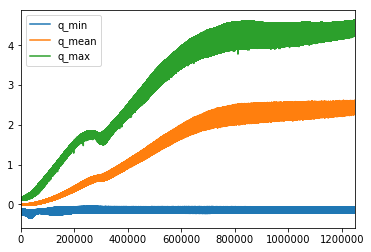

In [119]:
#Q values
qvalues.plot()

In [120]:
#ping pong effect
for episode in actions_list:
    pp=0
    pp_list=[]
    prior_action=[0,0]
    for action in range(len(episode)):
        pp_list+=[pp]
        if isinstance(action, list):
            if len(action)==2:
                if action[0]==prior_action[1] and action[1]==prior_action[0]:
                    pp+=1
                else:
                    pp=0
                prior_action=action
            else:
                prior_action=[0,0] 
                pp=0
    
    if max(pp_list)>8:
        f=open('probs_n'+run_name)
        triplets=f.read()
        #triplets = re.search('eps# '+str(1)+'(.*)'+'\neps# '+str(1+1),triplets)
        #triplets= triplets.group(1)
        start = 'eps# '+str(episode)+'\n'
        end = '\neps# '+str(episode+1)+'\n'
        s = triplets
        triplets= s[s.find(start)+len(start):s.rfind(end)]

        triplets=triplets.replace('\n', '').replace('    ', " ").replace('   ', " ").replace('  ', " ").split('][')
        #print(triplets)
        for i in range(0,len(triplets)): 
            triplets[i]=triplets[i].replace('[', "").replace(']', "").rstrip(' ').split(' ')
        f.close()
        #print(triplets)
        probs_mat=np.array(triplets, dtype=np.float)
        probs=pd.DataFrame(data=probs_mat,    # values
                     index=range(np.shape(probs_mat)[0]),    # 1st column as index
                     columns=range(1,54))
        probs.plot(linestyle='None', marker='.',markersize = 1.0)
    
        
            